<a href="https://colab.research.google.com/github/bhenderson11/Recruitment-Bias-in-Machine-Learning-Algorithms-/blob/main/Recruitment_Project_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dataset

In [2]:
 !pip install --upgrade scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_error
import sklearn.metrics
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from functools import partial
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.svm import SVR
from tabulate import tabulate
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#!pip install scikit-optimize scikit-learn==0.20.3

In [4]:
uploaded = files.upload()


Saving recruitment data.csv to recruitment data.csv


In [13]:
rcm = pd.read_csv(next(iter(uploaded.keys())))

Some Exploration of Dataset

In [14]:
rcm = rcm.drop(columns = ['Unnamed: 0'])

In [7]:
#check for nulls and fill with 0
rcm.fillna(0, inplace=True)
rcm.isna().sum()



,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [15]:
 #Manually encode age column (Under 35 to be 1, over 35 to be 0)
rcm['Age'] = rcm['Age'].apply(lambda x: 'Under 35' if x == '<35' else 'Over 35')

In [9]:

rcm.groupby('EdLevel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'sns' is not defined

In [16]:
rcm['Employed'] = rcm['Employed'].map({1: 'Yes', 0: 'No'})


In [17]:
rcm.groupby("Gender").count()

,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
Gender,,,,,,,,,,,,,
Man,68573,68573,68573,68573,68573,68573,68573,68573,68573,68573,68521,68573,68573
NonBinary,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1370,1371,1371
Woman,3518,3518,3518,3518,3518,3518,3518,3518,3518,3518,3508,3518,3518


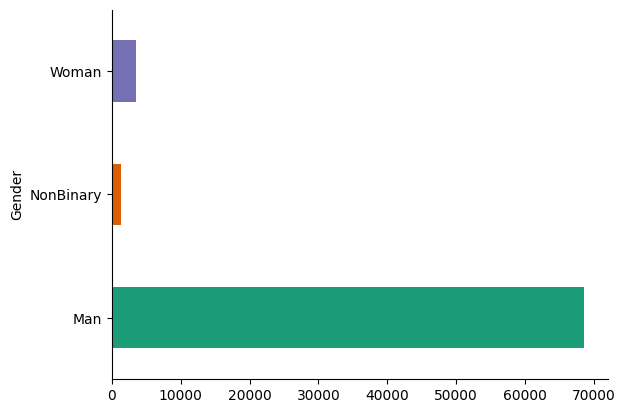

In [ ]:
# bar chart frequency of  Gender

from matplotlib import pyplot as plt
import seaborn as sns
rcm.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

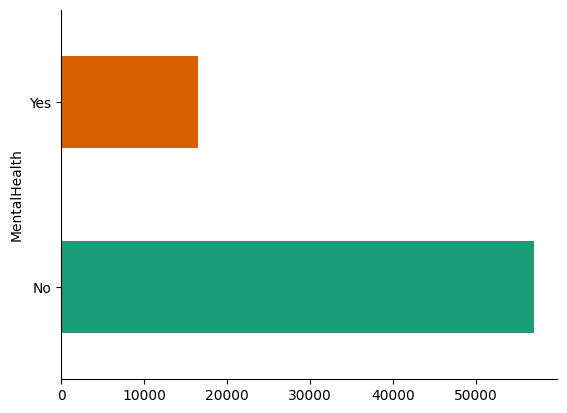

In [ ]:
# bar chart for frequency of MentalHealth

from matplotlib import pyplot as plt
import seaborn as sns
rcm.groupby('MentalHealth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

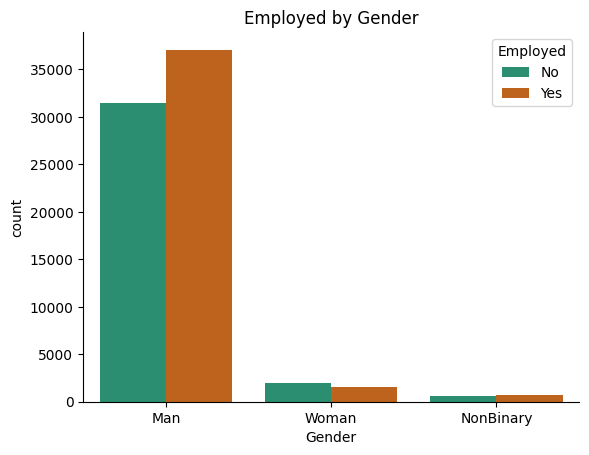

In [ ]:
plt.clf()
rcm['Employed'] = rcm['Employed']
sns.countplot(data=rcm, x='Gender', hue='Employed', palette='Dark2')
plt.title('Employed by Gender')
plt.legend(title='Employed', loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

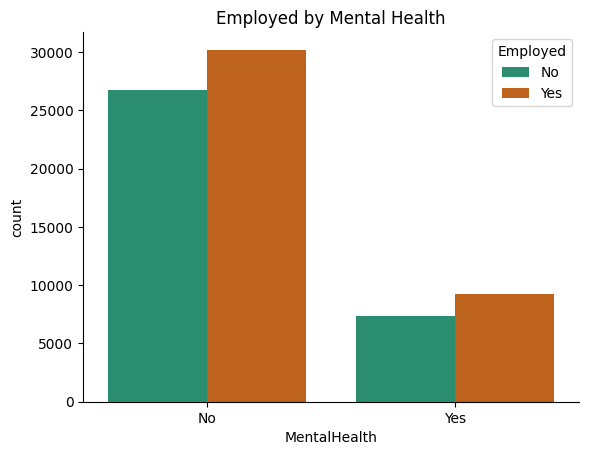

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(data=rcm, x='MentalHealth', hue='Employed', palette='Dark2')
plt.title('Employed by Mental Health')
plt.legend(title='Employed', loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

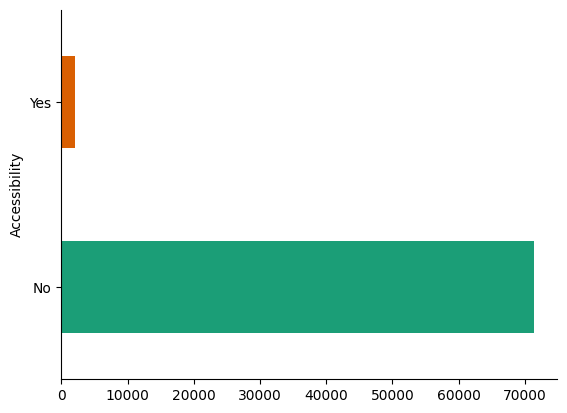

In [ ]:
# bar chart for frequency of  Accessibility

rcm.groupby('Accessibility').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

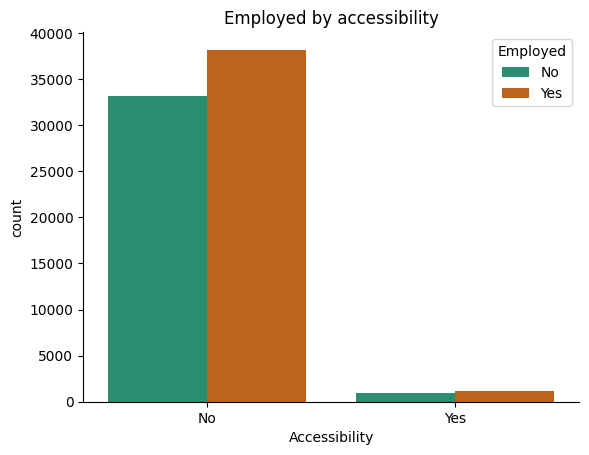

In [ ]:
#plot wether the target was employed based on accessibility
sns.countplot(data = rcm, x= 'Accessibility', hue ="Employed", palette = "Dark2")
plt.title("Employed by accessibility")
plt.legend(title= "Employed", loc = "upper right")
plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

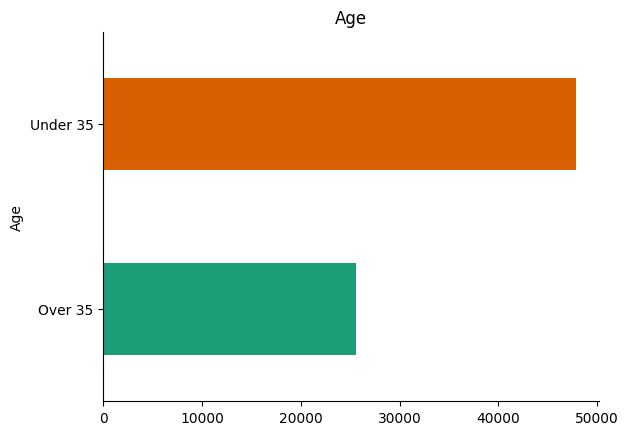

In [ ]:
# Frequency by age

rcm.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette("Dark2"), title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

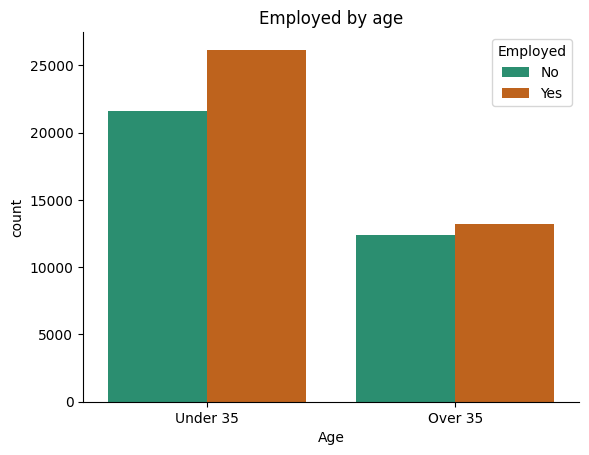

In [ ]:
#plot wether the target was employed based on age
sns.countplot(data = rcm, x= 'Age', hue ="Employed", palette = "Dark2")
plt.title("Employed by age")
plt.legend(title= "Employed", loc = "upper right")
plt.gca().spines[["top", "right"]].set_visible(False)
plt.show()

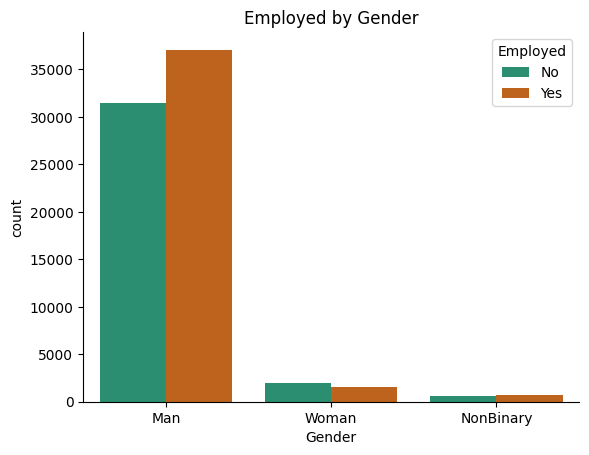

In [ ]:
#plot wheter the target was employed based on gender
# bar chart frequency of  Gender

sns.countplot(data=rcm, x='Gender', hue='Employed', palette='Dark2')
plt.title('Employed by Gender')
plt.legend(title='Employed', loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

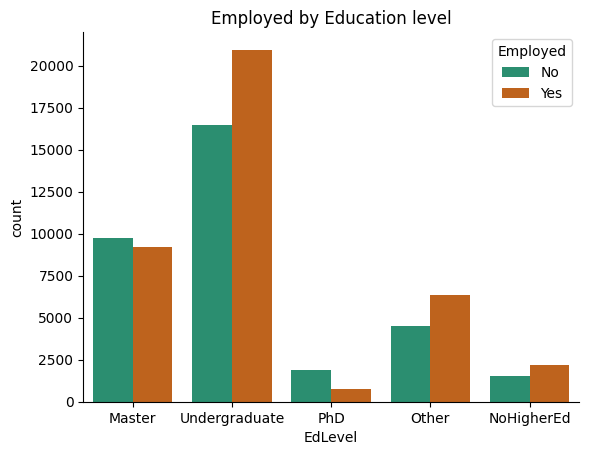

In [ ]:

sns.countplot(data=rcm, x='EdLevel', hue='Employed', palette='Dark2')
plt.title('Employed by Education level')
plt.legend(title='Employed', loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<Axes: xlabel='YearsCode', ylabel='PreviousSalary'>

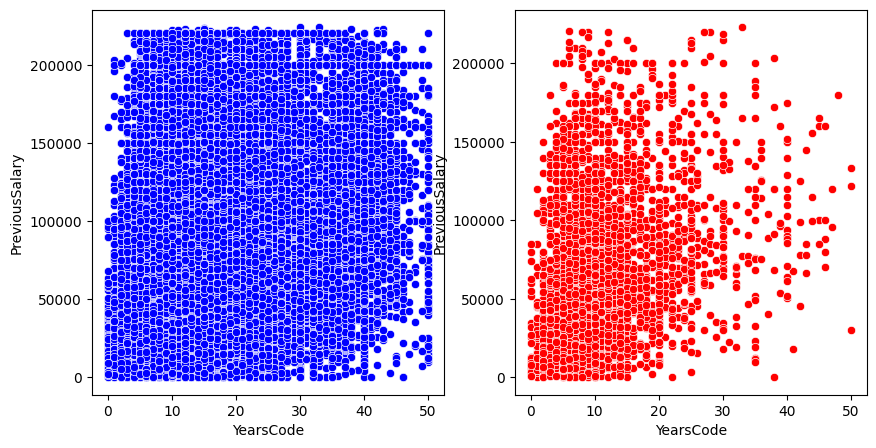

In [ ]:
#correlation of years coding and salary for women vs men
women = rcm[rcm["Gender"] == "Woman"]
men = rcm[rcm["Gender"] == "Man"]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x = men["YearsCode"], y = men["PreviousSalary"], color = "blue", ax = ax[0])
sns.scatterplot(x = women["YearsCode"], y = women["PreviousSalary"], color = "red", ax = ax[1])
m

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(data=rcm, x='MentalHealth', hue='Employed', palette='Dark2')
plt.title('Employed by Mental Health')
plt.legend(title='Employed', loc='upper right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<Axes: xlabel='YearsCodePro', ylabel='PreviousSalary'>

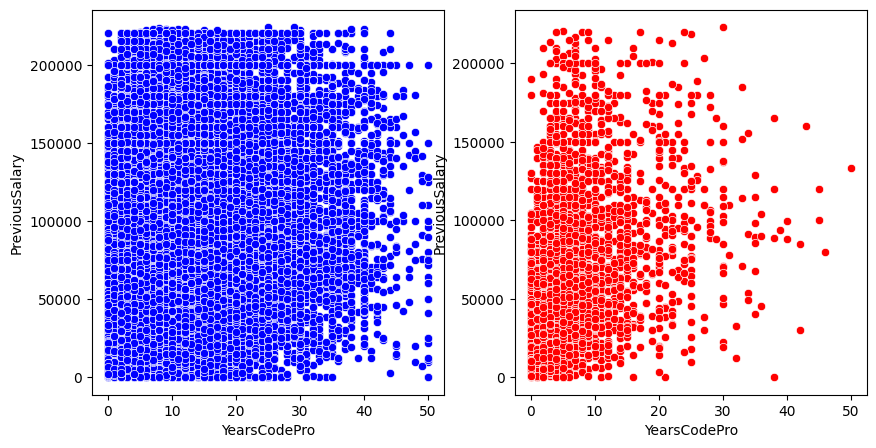

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x = men["YearsCodePro"], y = men["PreviousSalary"], color = "blue", ax = ax[0])
sns.scatterplot(x = women["YearsCodePro"], y = women["PreviousSalary"], color = "red", ax = ax[1])

<Axes: xlabel='ComputerSkills', ylabel='PreviousSalary'>

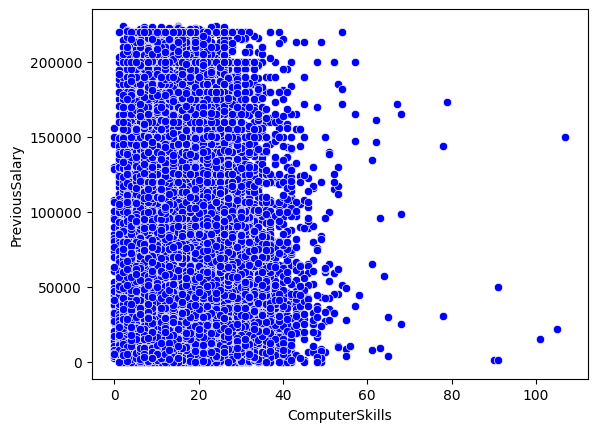

In [ ]:
#correlation of years coding and salary for women vs men

sns.scatterplot(x = rcm["ComputerSkills"], y = rcm["PreviousSalary"], color = "blue")
